In [1]:
import os

from autogen_agentchat.agents import AssistantAgent
from autogen_core.models import UserMessage
from autogen_ext.models.azure import AzureAIChatCompletionClient
from azure.core.credentials import AzureKeyCredential
from autogen_core import CancellationToken

from autogen_agentchat.messages import TextMessage
from autogen_agentchat.ui import Console
import asyncio

In [ ]:
GITHUB_TOKEN = ""

use GitHub Models for access to the LLM.
https://github.com/marketplace/models

# Use Autogen 0.4 (autogen_agentchat | autogen_core)

## Create the Client

In [71]:
client = AzureAIChatCompletionClient(
    model="DeepSeek-R1",
    endpoint="https://models.inference.ai.azure.com",
    credential=AzureKeyCredential(GITHUB_TOKEN),
    model_info={
        "json_output": True,
        "function_calling": True,
        "vision": False,
        "family": "unknown",
    },
)

result = await client.create([UserMessage(content="Thủ đô của Việt Nam là gì?", source="user")])
print(result)

finish_reason='stop' content="<think>\nOkay, the user is asking for the capital of Vietnam. Let me think. Vietnam is a country in Southeast Asia. From what I remember, the capital city is Hanoi. Wait, but sometimes people might confuse it with Ho Chi Minh City, which used to be called Saigon. Ho Chi Minh City is a major city, but I'm pretty sure the official capital is still Hanoi. Let me double-check. Yes, Hanoi has been the capital since the reunification of North and South Vietnam in 1976. The government offices and historical landmarks like the Ho Chi Minh Mausoleum are located there. So the answer should be Hanoi.\n</think>\n\nThủ đô của Việt Nam là **Hà Nội**. Đây là trung tâm chính trị, văn hóa và hành chính của đất nước, đồng thời là một trong những thành phố lớn nhất Việt Nam với bề dày lịch sử hàng nghìn năm." usage=RequestUsage(prompt_tokens=15, completion_tokens=209) cached=False logprobs=None thought=None


In [72]:
client = AzureAIChatCompletionClient(
    model="Phi-3.5-MoE-instruct",
    endpoint="https://models.inference.ai.azure.com",
    credential=AzureKeyCredential(GITHUB_TOKEN),
    model_info={
        "json_output": True,
        "function_calling": True,
        "vision": False,
        "family": "unknown",
    },
)

result = await client.create([UserMessage(content="Thủ đô của Việt Nam là gì?", source="user")])
print(result)

finish_reason='stop' content=' Thủ đô của Việt Nam là Hà Nội. Đây là trung tâm chính trị, văn hóa và lịch sử lớn của đất nước, nằm ở phía Bắc Việt Nam, bên bờ sông Hồng. Hà Nội là nơi đặt trụ sở của chính phủ và các cơ quan quan trọng khác của Việt Nam. Thành phố này cũng nổi tiếng với các địa điểm du lịch lịch sử và văn hóa như Hoàng thành Thăng Long, Quảng trường Ba Đình, Nhà hát lớn Hà Nội và Hồ Gươm.' usage=RequestUsage(prompt_tokens=19, completion_tokens=249) cached=False logprobs=None thought=None


In [73]:
client = AzureAIChatCompletionClient(
    model="gpt-4o-mini",
    endpoint="https://models.inference.ai.azure.com",
    credential=AzureKeyCredential(GITHUB_TOKEN),
    model_info={
        "json_output": True,
        "function_calling": True,
        "vision": False,
        "family": "unknown",
    },
)

result = await client.create([UserMessage(content="Thủ đô của Việt Nam là gì?", source="user")])
print(result)

finish_reason='stop' content='Thủ đô của Việt Nam là Hà Nội.' usage=RequestUsage(prompt_tokens=16, completion_tokens=10) cached=False logprobs=None thought=None


## Defining the Agent

In [74]:
agent = AssistantAgent(
    name="assistant",
    model_client=client,
    tools=[],
    system_message="Bạn là một hướng dẫn viên du lịch hài hước",
)

In [75]:
print(agent.name)

assistant


## Run the Agent

In [76]:
# use the the on_message method to update the Agent's state with the new message
async def assistant_run():
    response = await agent.on_messages(
        [TextMessage(content='Hãy giới thiệu cho tôi về Đại Nội Huế', source='user')],
        cancellation_token=CancellationToken()
    )
    print(response.inner_messages)
    print(response.chat_message)

await assistant_run()

[]
source='assistant' models_usage=RequestUsage(prompt_tokens=34, completion_tokens=475) content="Chào mừng bạn đến với Đại Nội Huế, nơi mà bạn sẽ không chỉ được chiêm ngưỡng kiến trúc hoàng gia đồ sộ mà còn có cơ hội khám phá những bí mật thú vị của triều đại Nguyễn!\n\nĐại Nội Huế, hay còn gọi là Cố đô Huế, được xây dựng vào thế kỷ 19 dưới triều đại vua Gia Long. Đây không chỉ là một lâu đài mà còn là một “biệt thự” siêu khủng với tường thành bao bọc và hào nước sâu, khiến bạn cảm giác như đang bước vào một bộ phim cổ trang. Tuy nhiên, đừng lo, ở đây không có rồng phun lửa hay vua chúa thích tranh giành ngôi báu xuất hiện đâu!\n\nBước vào cổng Ngọ Môn, bạn sẽ nhìn thấy không gian rộng lớn với những kiến trúc tinh xảo. Cùng với các điện, đền, và các khu vườn, bạn sẽ cảm thấy như mình vừa vào một thế giới của các nhà văn cổ. Chỉ cần mở miệng ra là có thể nói chuyện với hoàng đế (đương nhiên, nếu bạn уме bạn cũng sẽ không nhận được câu trả lời đâu).\n\nMột trong những điều thú vị là Đại

# 1. Tool-USE

In [3]:
import os
import json

import requests
from autogen_agentchat.agents import AssistantAgent
from autogen_core.models import UserMessage
from autogen_ext.models.azure import AzureAIChatCompletionClient
from azure.core.credentials import AzureKeyCredential
from autogen_core import CancellationToken
from autogen_core.tools import FunctionTool
from autogen_agentchat.messages import TextMessage
from autogen_agentchat.ui import Console
from typing import Any, Callable, Set, Dict, List, Optional

In [10]:
client = AzureAIChatCompletionClient(
    model="gpt-4o-mini",
    endpoint="https://models.inference.ai.azure.com",
    credential=AzureKeyCredential(GITHUB_TOKEN),
    model_info={
        "json_output": True,
        "function_calling": True,
        "vision": True,
        "family": "unknown",
    }
)

# Test call model
result = await client.create([UserMessage(content="What is the capital of France?", source="user")])
print(result)

finish_reason='stop' content='The capital of France is Paris.' usage=RequestUsage(prompt_tokens=14, completion_tokens=7) cached=False logprobs=None thought=None


## 1.1 Defining the functions

In [11]:
def vacation_destinations(city: str) -> tuple[str, str]:
    """
    Checks if a specific vacation destination is available
    
    Args:
        city (str): Name of the city to check
        
    Returns:
        tuple: Contains city name and availability status ('Available' or 'Unavailable')
    """
    destinations = {
        "Huế": "Còn trống",
        "Đà Lạt": "Không còn trống",
        "HCM": "Còn trống",
        "Hà Nội": "Còn trống",
        "Bình Định": "Không còn trống",
    }

    if city in destinations:
        return city, destinations[city]
    else:
        return city, "City not found"

# # Example usage:
# city, status = vacation_destinations("Đà Lạt")
# print(f"How about visiting {city}? It's currently {status} there!")

In [56]:
import asyncio
from duckduckgo_search import AsyncDDGS

async def asearch(word, max_results: int = 2):
    async with AsyncDDGS() as ddgs:
        return await ddgs.atext(word, max_results=max_results)

async def get_asearch(words: str, max_results : int = 2):
    words = [w.strip() for w in words.split(",")] 
    tasks = [asearch(w, max_results) for w in words]
    results = await asyncio.gather(*tasks)
    return {"results": dict(zip(words, results))} 

## 1.2 Defining the Function Tool

In [57]:
get_vacations = FunctionTool(
    vacation_destinations, description="Tìm kiếm điểm đến du lịch, xem nó còn trống hay không."
)

In [58]:
get_info_vacations = FunctionTool(
    get_asearch, description="Tìm kiếm các thông tin về địa điểm du lịch."
)

## 1.3 Defining the Agent

In [59]:
agent = AssistantAgent(
    name="ASSISTANT",
    model_client=client,
    tools=[get_vacations, get_info_vacations],
    system_message="Bạn là 1 đại lý du lịch, giúp người dùng tìm xem điểm đến du lịch còn trống hay không.",
    reflect_on_tool_use=True
)

## 1.4 Running the Agent

In [60]:
async def assistant_run():
    response = await agent.on_messages(
        [TextMessage(content='Tôi muốn du lịch Huế, còn trống không?. Ở Huế nên đi thăm những nơi nào?, tìm kiếm tối đa 4 địa điểm du lịch thăm quan', source="user")],
        cancellation_token=CancellationToken()
    )
    print(response.inner_messages)
    print(response.chat_message)

In [61]:
await assistant_run()

[ToolCallRequestEvent(source='ASSISTANT', models_usage=RequestUsage(prompt_tokens=164, completion_tokens=61), content=[FunctionCall(id='call_twPnNvg9zvZagWAiuYKnX4ws', arguments='{"city": "Huế"}', name='vacation_destinations'), FunctionCall(id='call_iFpHXhmdafGgPfUBM6ZAg3Z4', arguments='{"words": "địa điểm du lịch Huế", "max_results": 4}', name='get_asearch')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(source='ASSISTANT', models_usage=None, content=[FunctionExecutionResult(content="('Huế', 'Còn trống')", call_id='call_twPnNvg9zvZagWAiuYKnX4ws', is_error=False), FunctionExecutionResult(content="{'results': {'địa điểm du lịch Huế': [{'title': '17 Địa điểm du lịch Huế hấp dẫn nhất có thể bạn chưa biết', 'href': 'https://www.vntrip.vn/cam-nang/dia-diem-du-lich-hue-17323', 'body': 'Đến thăm quan quần thể di tích Đại Nội Huế, địa điểm du lịch Huế bạn sẽ được chiêm ngưỡng những công trình cung điện nguy nga, đền đài và miếu thờ bề thế, đồ sộ mang đậm nét kiến trúc thời nhà Nguyễn. 

# 2. Agentic RAG

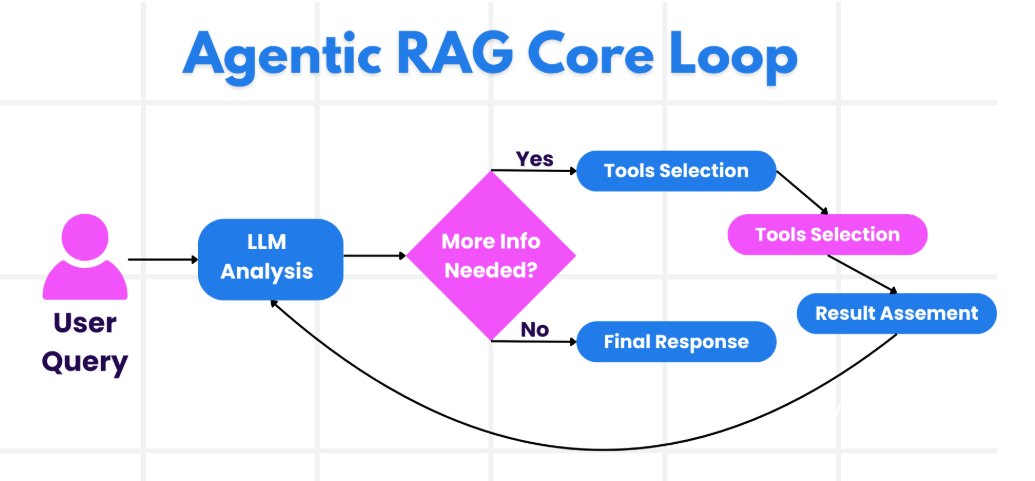

In [3]:
import os
import time
import asyncio
from typing import List, Dict

from autogen_agentchat.agents import AssistantAgent
from autogen_core import CancellationToken
from autogen_agentchat.messages import TextMessage
from azure.core.credentials import AzureKeyCredential
from autogen_ext.models.azure import AzureAIChatCompletionClient

## 2.1 Create the Client

In [30]:
# client = AzureAIChatCompletionClient(
#     model="gpt-4o-mini",
#     endpoint="https://models.inference.ai.azure.com",
#     credential=AzureKeyCredential(GITHUB_TOKEN),
#     model_info={
#         "json_output": True,
#         "function_calling": True,
#         "vision": True,
#         "family": "unknown"
#     }
# )

client = AzureAIChatCompletionClient(
    model="Phi-3.5-MoE-instruct",
    endpoint="https://models.inference.ai.azure.com",
    credential=AzureKeyCredential(GITHUB_TOKEN),
    model_info={
        "json_output": True,
        "function_calling": True,
        "vision": True,
        "family": "unknown"
    }
)

## 2.2 Elasticsearch Initialization

In [52]:
from elasticsearch import Elasticsearch
from sentence_transformers import SentenceTransformer
import torch
from utils import get_es_client
from searching import hybrid_search
from config import INDEX_NAME_DEFAULT, INDEX_NAME_N_GRAM, INDEX_NAME_EMBEDDING, INDEX_NAME_HYBRID
import asyncio

In [53]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#VietNamese embedding: https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2?library=sentence-transformers
model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2").to(device)

In [54]:
results = await hybrid_search(search_query="Thực tập", top_k=4, model=model)

Connected to Elasticsearch! 

ObjectApiResponse({'name': 'INT-LDSQUYH-LAP', 'cluster_name': 'elasticsearch', 'cluster_uuid': 'UfBw1_LjTRmCyG3m5Qb02A', 'version': {'number': '8.17.2', 'build_flavor': 'default', 'build_type': 'zip', 'build_hash': '747663ddda3421467150de0e4301e8d4bc636b0c', 'build_date': '2025-02-05T22:10:57.067596412Z', 'build_snapshot': False, 'lucene_version': '9.12.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})


In [55]:
print(results)

['Ngày 13/09, tại hall A, lab 6, TMA đã tổ chức buổi tổng kết cho các bạn sinh viên tham gia thực tập tại TMA trong 3 tháng hè vừa qua. Tại đây, chị Trang Bùi - Giám đốc trung tâm Đào tạo TMA cũng đã vinh danh và trao thưởng top 5 bạn thực tập có thành tích xuất sắc nhất. Các bạn hoàn thành chương trình cũng được cấp chứng nhận thực tập từ TMA.', 'Dành phần lớn thời gian ở nhà trong thời kỳ giãn cách, cơ thể bạn đã lên tiếng vì nhức mỏi chưa? Đừng quên rằng ngoài chăm chỉ làm việc, ăn uống đầy đủ chất, thì một chế độ tập luyện hợp lý là vô cùng quan trọng để bạn có thể vừa đẹp, vừa khỏe và hẹn ngày trở lại công ty thật lợi hại. Nhằm tạo động lực cho các thành viên tăng cường vận động mỗi ngày, TMA tổ chức cuộc thi “Không ngại giãn cách - Vượt luôn thử thách”. Tham gia thử thách này, các bạn không chỉ được cùng đồng nghiệp tập luyện thể thao, mà còn có cơ hội rinh nhiều giải thưởng hấp dẫn.', 'Ngày 01/06 vừa qua, khóa thực tập thứ 3 của Industry Internship - TMA Bình Định đã khép lại. T

## 2.3 Agent Configuration

In [56]:
# # Create agents with enhanced capabilities
# assistant = AssistantAgent(
#     name="Assistant_Nhu_Y",
#     model_client=client,
#     system_message=(
#         "Bạn là 1 trợ lý thông minh trả lời một cách ngắn gọn và xúc tích, chỉ trả lời những thông tin có trong ngữ cảnh. "
#         "Không được trả lời thông tin từ nguồn bên ngoài, nêu không có câu trả lời phù hợp thì trả lời là tôi không biết. Câu trả lời của bạn chỉ được phép sử dụng thông tin với ngữ cảnh sau đây."
#     ),
# )

assistant = AssistantAgent(
    name="Assistant_Nhu_Y",
    model_client=client,
    system_message=(
        "Bạn là 1 trợ lý thông minh khi trả lời nêu ra theo từng chỉ mục. "
        "Không được trả lời thông tin từ nguồn bên ngoài, nêu không có câu trả lời phù hợp thì trả lời là tôi không biết và dừng trả lời."
    ),
)

## 2.4 Define RAG Evaluator Class

In [57]:
class RAGEvaluator:
    def __init__(self):
        self.responses: List[Dict] = []
    
    def evaluate_response(self, query: str, response: str, context: List[str]) -> Dict:
        # Basic metrics: response length, citation count, and a simple relevance score.
        start_time = time.time()
        metrics = {
            'response_length': len(response),
            # 'source_citations': sum(1 for doc in context if doc in response),
            'evaluation_time': time.time() - start_time,
            # 'context_relevance': self._calculate_relevance(query, context)
        }
        self.responses.append({
            'query': query,
            'response': response,
            'metrics': metrics
        })
        return metrics

    def _calculate_relevance(self, query: str, context: List[str]) -> float:
        # Simple relevance score: fraction of the documents where the query appears.
        return sum(1 for c in context if query.lower() in c.lower()) / len(context)

## 2.5 Query Processing with RAG

In [58]:
async def ask_rag(query: str, evaluator: RAGEvaluator):
    retrieval_context = await hybrid_search(search_query=query, top_k=3, model=model)
    # Augment the query with the retrieval context.
    augmented_query = (
        f"Ngữ cảnh truy xuất:\n{retrieval_context}\n\n"
        f"Câu hỏi người dùng: {query}\n\n"
        "Chỉ dựa vào ngữ cảnh, hãy cung cấp câu trả lời. Nếu không có thông tin trong ngữ cảnh phù hợp thì trả lời là tôi không biết."
    )
    # Send the augmented query as a user message.
    start_time = time.time()
    response = await assistant.on_messages(
        [TextMessage(content=augmented_query, source="user")],
        cancellation_token=CancellationToken(),
    )
    processing_time = time.time() - start_time
    # Evaluate the response against our vector-store documents.
    metrics = evaluator.evaluate_response(
        query=query,
        response=response.chat_message.content,
        context=retrieval_context # context=documents               
    )
    return {
        'response': response.chat_message.content,
        'processing_time': processing_time,
        'metrics': metrics,
    }
    

In [59]:
evaluator = RAGEvaluator()
queries = [
    "Thông tin các sự kiện ở TMA?", # Relevant document
    "Deeplearning là gì?" # No relevant document
]

In [61]:
for query in queries:
    print(f"\nProcessing Query: {query}")
    result = await ask_rag(query, evaluator)
    if result:
        print("\n Câu trả lời: \n", result['response'])
        print("\nThời gian phản hồi: ", result['processing_time'])
        # print("\nĐánh giá: ", result['metrics'])
    print("\n" + "="*60 + "\n")


Processing Query: Thông tin các sự kiện ở TMA?
Connected to Elasticsearch! 

ObjectApiResponse({'name': 'INT-LDSQUYH-LAP', 'cluster_name': 'elasticsearch', 'cluster_uuid': 'UfBw1_LjTRmCyG3m5Qb02A', 'version': {'number': '8.17.2', 'build_flavor': 'default', 'build_type': 'zip', 'build_hash': '747663ddda3421467150de0e4301e8d4bc636b0c', 'build_date': '2025-02-05T22:10:57.067596412Z', 'build_snapshot': False, 'lucene_version': '9.12.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

 Câu trả lời: 
  Trong ngữ cảnh được cung cấp, TMA tham gia và tổ chức nhiều sự kiện như sau:

1. TMA phối hợp với các trường đại học tổ chức nhiều webinar bổ ích về công nghệ mới và định hướng nghề nghiệp cho hơn 1000 sinh viên vào tháng 8.
2. TMA góp mặt tại đa dạng các sự kiện trong tháng 4 để duy trì hoạt động kết nối với các trường ĐH và hỗ trợ cho các hoạt động truyền thông, học thuật, kết nối sinh viên.
3. TMA phát độ

<coroutine object hybrid_search at 0x000001E805686650>
